In [3]:
import json
 
f = open('5may2022-graph.json') #LND `describegraph` output taken on May 5, 2022
data = json.load(f)
f.close()

print("# nodes = " + str(len(data['nodes'])))
print("# edges = " + str(len(data['edges'])))
 
PK = [x['pub_key'] for x in data['nodes']]
PKtoV = {}
for i in range(len(PK)):
    PKtoV[PK[i]] = i;
    
n = len(data['nodes'])
E = {};
E_w = {};
for v in range(n):
    E[v] = [];
    E_w[v] = [];
for e in data['edges']:
    u = PKtoV[e['node1_pub']]
    v = PKtoV[e['node2_pub']]
    C = int(e['capacity'])
    E[u].append([v, 1]) # unweighted graph
    E[v].append([u, 1])
    E_w[u].append([v, C]) # weighted graph
    E_w[v].append([u, C])


# nodes = 17813
# edges = 84927


In [4]:
# greedy algorithm #1
# returns list partition, s.t. partition[v] = 0/1 depending on the side of v in the partition
def COMPUTE_IMBALANCED_MAX_CUT(n, E, k):
    if (n<k):
        return [];
    partition = [0] * n # initially all nodes are on the 0 side
    for i in range(k):
        print("greedy step " + str(i+1) + "/" + str(k))
        best_vertex = -1;
        best_increase = 0;
        for j in range(n):
            if (partition[j] == 0): # consider only nodes still on the 0 side
                C_cut = 0; # compute total capacity incident to node j in the cut
                C_notcut = 0; # compute total capacity incident to node j NOT in the cut
                for e in E[j]:
                    if (partition[e[0]] == 0):
                        C_notcut += e[1];
                    else:
                        C_cut += e[1];
                new_increase = C_notcut - C_cut;
                if ((best_vertex < 0) or (new_increase > best_increase)):
                    best_vertex = j;
                    best_increase = new_increase;
        partition[best_vertex] = 1; # make best greedy move
    return partition

# returns the capacities of all greedy max cuts for all values of k
# i.e. cut_capacity[i] is the capacity of the greedy max cut with i nodes on one side
# note that cut_capacity[i] for all i>n/2 is ommitted since capacity[i] <= capacity[n-i] in this case
def COMPUTE_ALL_GREEDY_IMBALANCED_MAX_CUTS(n, E):
    cut_capacity = [0]
    edges_count = [0]
    partition = [0] * n # initially all nodes are on the 0 side
    for i in range(int(n/2)): # consider only cuts of up to n/2 nodes on one side
        if (int(i*100/(n/2))>int((i-1)*100/(n/2))):
            print("greedy step " + str(i+1) + "/" + str(n/2))
        best_vertex = -1;
        best_increase = 0;
        for j in range(n):
            if (partition[j] == 0): # consider only nodes still on the 0 side
                C_cut = 0; # compute total capacity incident to node j in the cut
                C_notcut = 0; # compute total capacity incident to node j NOT in the cut
                a = 0
                b = 0
                for e in E[j]:
                    if (partition[e[0]] == 0):
                        C_notcut += e[1];
                        b += 1
                    else:
                        C_cut += e[1];
                        a += 1

                new_increase = C_notcut - C_cut;
                if ((best_vertex < 0) or (new_increase > best_increase)):
                    tmp = b - a
                    best_vertex = j;
                    best_increase = new_increase;
        partition[best_vertex] = 1; # make best greedy move
        cut_capacity.append(cut_capacity[-1] + best_increase)
        edges_count.append(edges_count[-1] + tmp)

       #print(f"Edges for k={i+2}: {edges_count[-1]}")

    return cut_capacity, edges_count

In [5]:
P = COMPUTE_IMBALANCED_MAX_CUT(n, E, 10)
C, edges_count = COMPUTE_ALL_GREEDY_IMBALANCED_MAX_CUTS(n, E)
C_w, edges_count_w = COMPUTE_ALL_GREEDY_IMBALANCED_MAX_CUTS(n, E_w)

greedy step 1/10
greedy step 2/10
greedy step 3/10
greedy step 4/10
greedy step 5/10
greedy step 6/10
greedy step 7/10
greedy step 8/10
greedy step 9/10
greedy step 10/10
greedy step 91/8906.5
greedy step 180/8906.5
greedy step 269/8906.5
greedy step 358/8906.5
greedy step 447/8906.5
greedy step 536/8906.5
greedy step 625/8906.5
greedy step 714/8906.5
greedy step 803/8906.5
greedy step 892/8906.5
greedy step 981/8906.5
greedy step 1070/8906.5
greedy step 1159/8906.5
greedy step 1248/8906.5
greedy step 1337/8906.5
greedy step 1427/8906.5
greedy step 1516/8906.5
greedy step 1605/8906.5
greedy step 1694/8906.5
greedy step 1783/8906.5
greedy step 1872/8906.5
greedy step 1961/8906.5
greedy step 2050/8906.5
greedy step 2139/8906.5
greedy step 2228/8906.5
greedy step 2317/8906.5
greedy step 2406/8906.5
greedy step 2495/8906.5
greedy step 2584/8906.5
greedy step 2673/8906.5
greedy step 2763/8906.5
greedy step 2852/8906.5
greedy step 2941/8906.5
greedy step 3030/8906.5
greedy step 3119/8906.5
g

Weighted Max-Cut:

max cut capacity = 246436727385
max cut edges = 58531
k = 10
capacity = 115024970624 / 246436727385 = 46.68%
edges = 10125 / 63251 = 16.01%
k = 20
capacity = 149079207327 / 246436727385 = 60.49%
edges = 17183 / 63251 = 27.17%
k = 30
capacity = 167165600785 / 246436727385 = 67.83%
edges = 19845 / 63251 = 31.37%
k = 40
capacity = 178688557000 / 246436727385 = 72.51%
edges = 22562 / 63251 = 35.67%
k = 50
capacity = 187401441000 / 246436727385 = 76.04%
edges = 26137 / 63251 = 41.32%
k = 60
capacity = 194168468110 / 246436727385 = 78.79%
edges = 27756 / 63251 = 43.88%
k = 70
capacity = 199596040666 / 246436727385 = 80.99%
edges = 31004 / 63251 = 49.02%
k = 80
capacity = 203993916648 / 246436727385 = 82.78%
edges = 32536 / 63251 = 51.44%
k = 90
capacity = 207599025311 / 246436727385 = 84.24%
edges = 34614 / 63251 = 54.72%
k = 100
capacity = 210496850450 / 246436727385 = 85.42%
edges = 35361 / 63251 = 55.91%
k = 110
capacity = 213042452668 / 246436727385 = 86.45%
edges = 36

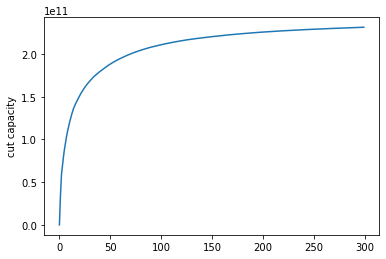

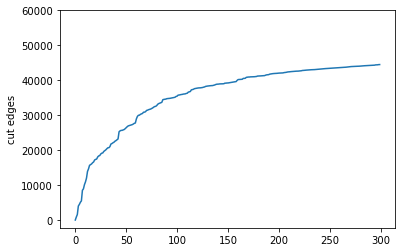

Unweighted Max-Cut:

max cut edges = 63251
k = 10
edges = 14916 / 63251 = 23.58%
k = 20
edges = 22100 / 63251 = 34.94%
k = 30
edges = 26369 / 63251 = 41.69%
k = 40
edges = 29687 / 63251 = 46.94%
k = 50
edges = 32496 / 63251 = 51.38%
k = 60
edges = 34931 / 63251 = 55.23%
k = 70
edges = 37147 / 63251 = 58.73%
k = 80
edges = 39061 / 63251 = 61.76%
k = 90
edges = 40594 / 63251 = 64.18%
k = 100
edges = 41937 / 63251 = 66.30%
k = 110
edges = 43115 / 63251 = 68.16%
k = 120
edges = 44161 / 63251 = 69.82%
k = 130
edges = 45044 / 63251 = 71.21%
k = 140
edges = 45812 / 63251 = 72.43%
k = 150
edges = 46507 / 63251 = 73.53%
k = 160
edges = 47142 / 63251 = 74.53%
k = 170
edges = 47730 / 63251 = 75.46%
k = 180
edges = 48282 / 63251 = 76.33%
k = 190
edges = 48804 / 63251 = 77.16%
k = 200
edges = 49293 / 63251 = 77.93%
k = 210
edges = 49754 / 63251 = 78.66%
k = 220
edges = 50183 / 63251 = 79.34%
k = 230
edges = 50597 / 63251 = 79.99%
k = 240
edges = 50985 / 63251 = 80.61%
k = 250
edges = 51343 / 63251 

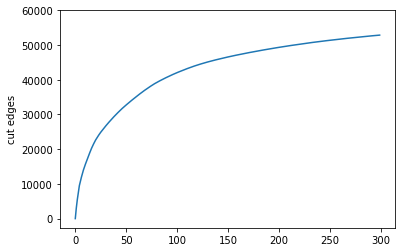

In [7]:
import matplotlib.pyplot as plt
import numpy as np

print("Weighted Max-Cut:\n")

print("max cut capacity = " + str(max(C_w)))
print("max cut edges = " + str(max(edges_count_w)))

for k in range(10, 301, 10):
    print("k = " + str(k))
    print(f'capacity = {C_w[k-1]:d} / {max(C_w):d} = {100*C_w[k-1]/max(C_w):2.2f}%')
    #print(f'edges = {C[k-1]:d} / {max(C):d} = {100*C[k-1]/max(C):2.2f}%')
    print(f'edges = {edges_count_w[k-1]:d} / {max(C):d} = {100*edges_count_w[k-1]/max(C):2.2f}%') # max(edges_count_w)

plt.plot(C_w[0:k])
plt.ylabel('cut capacity')
plt.show()

plt.plot(edges_count_w[0:k])
plt.ylabel('cut edges')
plt.yticks(np.linspace(0, 60000, num=7)) 
plt.show()

print("Unweighted Max-Cut:\n")

#print("max cut capacity = " + str(max(C_w)))
print("max cut edges = " + str(max(edges_count)))

for k in range(10, 301, 10):
    print("k = " + str(k))
    #print(f'capacity = {C_w[k-1]:d} / {max(C_w):d} = {100*C_w[k-1]/max(C_w):2.2f}%')
    #print(f'edges = {C[k-1]:d} / {max(C):d} = {100*C[k-1]/max(C):2.2f}%')
    print(f'edges = {edges_count[k-1]:d} / {max(edges_count):d} = {100*edges_count[k-1]/max(edges_count):2.2f}%')

# plt.plot(C_w[0:k])
# plt.ylabel('cut capacity')
# plt.show()

plt.plot(edges_count[0:k])
plt.ylabel('cut edges')
plt.yticks(np.linspace(0, 60000, num=7)) 
plt.show()

